# 데이터 축소 : 특징 선택

#### 특징 선택 방안
* Filter : 특징(변수) 별 통계적 점수 및 순위 기반의 특징 선택
* Wrapper : 특징 조합을 반복(재귀)적으로 찾아 최적 특징 조합을 선택
* Embedded : 모델 학습 성능에 기여한 특징을 선택(알고리즘 내장 함수 활용)
* boruta algorithm : 랜덤 변수 생성 기반의 유의미하지 않은 특징을 제거하는 특징 선택 알고리즘

### Wrapper 기반 특징 선택
#### 원 데이터 내 변수 간 조합을 탐색하여 특징을 선택하는 방법

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Breast Cancer 데이터 활용 기반 실습
# 데이터 로딩
cancer = pd.read_csv('../data/wdbc.data')

# 데이터 컬럼명 지정 -> 그냥 숫자로 지정
cancer.columns = np.arange(0, 32, 1)

In [4]:
cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
# id 를 index화
cancer.set_index(0).head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 테스트 데이터 셋으로 나눈다
# 데이터(독립변수)는 행렬이므로 대문자(X), 타깃(종속변수)은 1차원 벡터이므로 소문자(y)
input_data = cancer.drop([1], axis=1)
target_data = cancer[[1]]
X_train, X_test, y_train, y_test = train_test_split( input_data, target_data, random_state=1)

print(X_train.shape)
print(X_test.shape)
# 모델 학습용 및 성능 측정용으로 데이터 나눈다. 

(426, 31)
(142, 31)


In [15]:
# input train data와 target train data 를 병합한다
# index 기준 병함
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True, how='inner')
train_df.set_index(0)

,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,1
0,,,,,,,,,,,,,,,,,,,,,
84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.102800,0.2164,0.07356,...,31.48,136.80,1315.0,0.17890,0.42330,0.47840,0.20730,0.3706,0.11420,M
922577,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399,B
873592,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,0.05770,...,32.85,220.80,3216.0,0.14720,0.40340,0.53400,0.26880,0.2856,0.08082,M
914580,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.023690,0.1526,0.06046,...,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661,B
878796,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.162000,0.2200,0.06229,...,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866714,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.028820,0.1880,0.06471,...,17.81,91.38,545.2,0.14270,0.25850,0.09915,0.08187,0.3469,0.09241,B
869476,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.030030,0.1995,0.07839,...,16.51,86.26,509.6,0.14240,0.25170,0.09420,0.06042,0.2727,0.10360,B
859983,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.050690,0.1662,0.06566,...,20.86,110.30,812.4,0.14110,0.35420,0.27790,0.13830,0.2589,0.10300,M


In [12]:
# 위 데이터에서 악성(M), 양성(B)간의 데이터 분포를 확인해보기 위해 히스토 그램을 활용하자
import matplotlib.pyplot as plt
import seaborn as sns

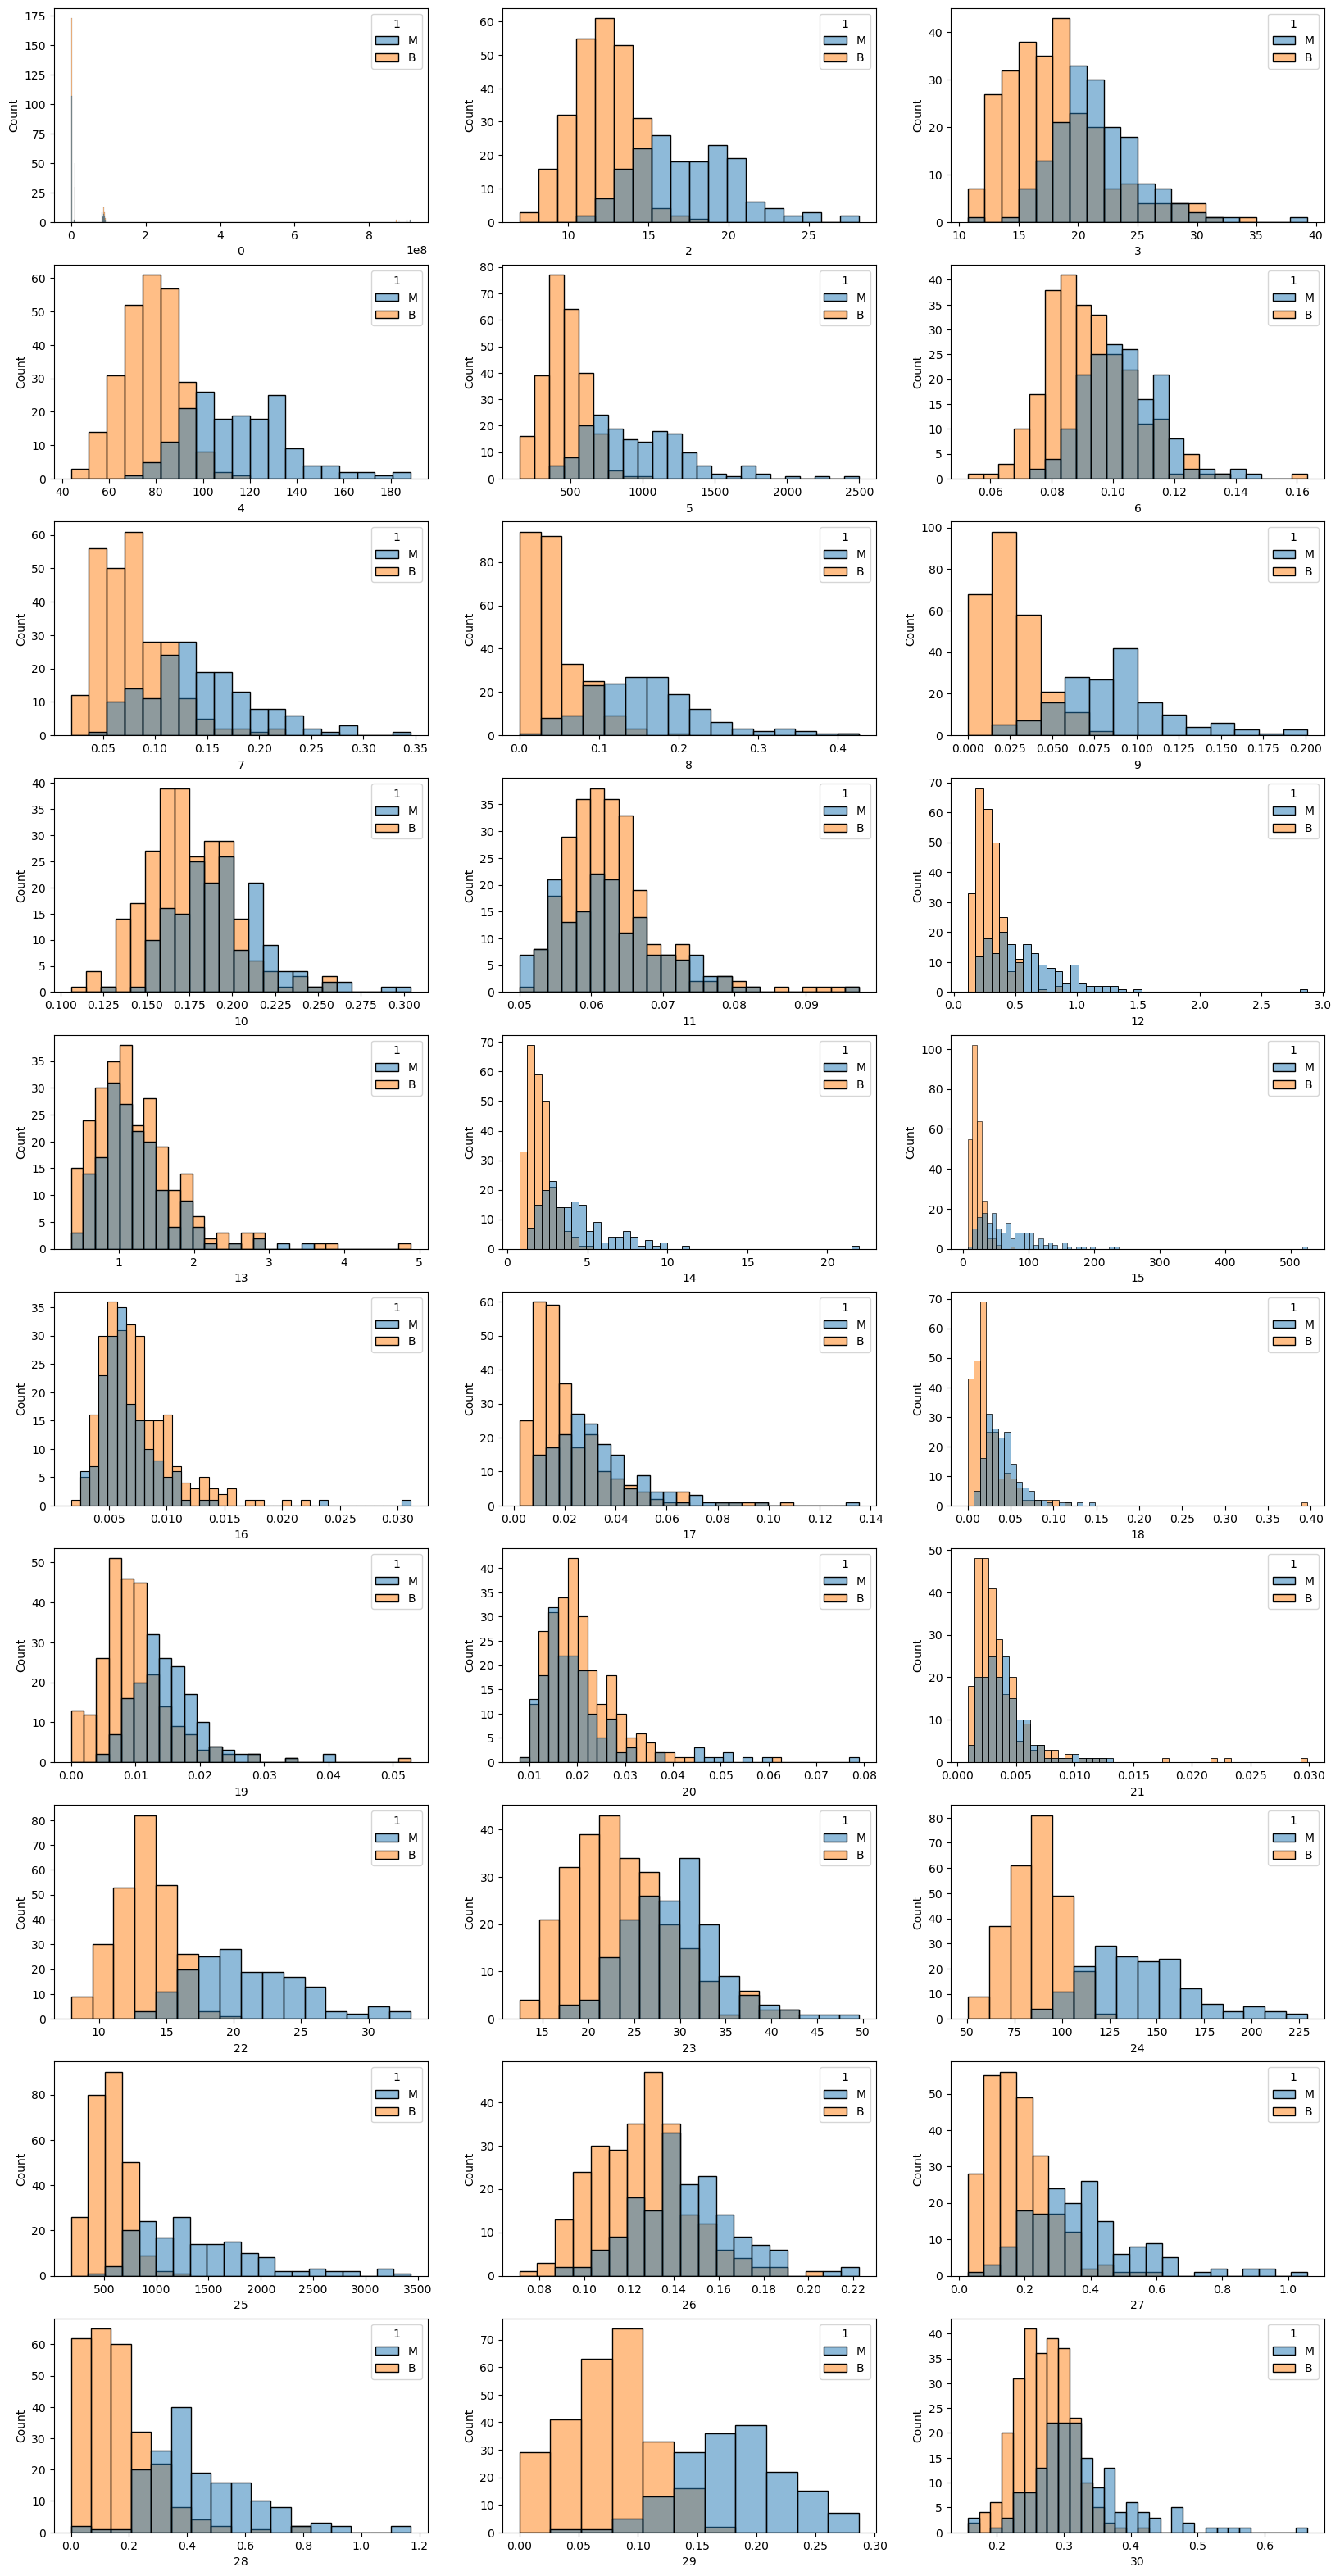

In [16]:
fig, axes = plt.subplots(10, 3, figsize=(20,40))
axes = axes.flatten()

for i in range(30):
    sns.histplot(data=train_df, x = train_df.columns[i], hue=1, multiple='layer', ax=axes[i])
    # 여기서 hue = 1의 1은 diagnosis을 대신하는 컬럼명이다.

* 독립 변수별로 악성과 양성의 분포도를 볼 수 있다.
* 변수를 보면 악성과 양성의 구분이 잘되어있는 변수와 
* 구분이 안 되어 많이 겹치는 변수를 확인할 수 있다.

### RFE 기분 주요 특징 선택

In [18]:
# recursive feature elimination

from sklearn.svm import SVC # RFE에 활용할 알고리즘을 SVM 으로 한다.
from sklearn.feature_selection import RFE

#### SVM 기반의 RFE 방식 Reference
* SVM을 기반의 RFE를 적용하여 대장암과 관련된 유전자 선별을 진행한 연구 논문에서
* 4개의 유전자를 최종적으로 선택하여 classification accuracy 를 86%에서 98% 개선하였다고 결과 발표

In [19]:
# SVM 기반 RFE 수행
from sklearn.preprocessing import StandardScaler
# 스케일에 민감한 SVM의 특징에 따라 변수의 scaling을 따로 진행

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

In [22]:
# RFE를 적용할 모델 SVM 지정
estimator_mdi = SVC(kernel='linear')
# SVM 학습 기반의 RFE 실행 및 유의미한 개수 지정 : 5개
svm_rfe = RFE(estimator = estimator_mdi, n_features_to_select=5) # 좋은 feature 5개 찾겠다!

svm_rfe_rst = svm_rfe.fit(scaled_X_train, y_train.values.ravel())
# revel() 는 reshape() 와 반대 개념 
# reshape() 가 (10) -> (2,5) 처럼 형태를 바꿔준다면
# revel()은 (2,5) -> 10 처럼 1차원데이터로 펴주는 기능이다.

svm_rfe_rst.ranking_ # 각 변수별 중요도 순위
# 1로 나온 변수가 최종 유의미한 특징으로 도출된 컬럼

array([26, 15, 27, 17, 11, 23,  3,  1,  4, 24, 18,  1,  8, 16,  7, 20, 13,
       19,  6, 22,  1,  1,  5, 10,  1,  9, 21, 12, 25, 14,  2])

In [35]:
# 도출된 특징 조합으로 test 진행
# test 데이터는 학습시키지 않는다. 그것까지 학습해버리면 제대로 검증할 수 없음
scaled_X_test = scaler.transform(X_test)
prediction = pd.DataFrame(svm_rfe.predict(scaled_X_test), columns=['pred_rst'])
prediction


,pred_rst
0,B
1,M
2,M
3,B
4,B
...,...
137,B
138,B
139,B
140,M


In [37]:
# 타겟 클래스 데이터 수치형 변경
y_test[1] = y_test[1].replace('M',1) # [1]은 column name 'diagnosis'를 의미
y_test[1] = y_test[1].replace('B',0)
prediction['pred_rst'] = prediction['pred_rst'].replace('M',1)
prediction['pred_rst'] = prediction['pred_rst'].replace('B',0)

In [38]:
# 결과 확인
# accuray
from sklearn.metrics import accuracy_score
print('accuracy :', round(accuracy_score(y_test[1], prediction['pred_rst']), 5)) # [1] : ['diagnosis']

#auc
from sklearn.metrics import roc_auc_score
print('auc : ', round(roc_auc_score(y_test[1], prediction['pred_rst']),5))

accuracy : 0.93662
auc :  0.92824


In [43]:
# 동일한 SVM RFE 수행하되 10개 특징을 선택 해보기
estimator_mdi = SVC(kernel='linear')
# SVM 학습 기반의 RFE 실행 및 유의미한 개수 지정 : 10개
re_svm_rfe = RFE(estimator = estimator_mdi, n_features_to_select=10)
re_svm_rfe_rst = re_svm_rfe.fit(scaled_X_train, y_train.values.ravel())

re_prediction = pd.DataFrame(re_svm_rfe.predict(scaled_X_test), columns=['pred_rst'])
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('B',0)
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('M',1)

# accuracy
print('accuracy : ', round(accuracy_score(y_test[1], re_prediction['pred_rst']),5))
# auc
print('auc : ', round(roc_auc_score(y_test[1], re_prediction['pred_rst']),5))


accuracy :  0.98592
auc :  0.9899


* 5개 특징 선택한 것보다 10개 특징한 결과가 정확도가 더 높아졌다
* 강사님 실습에서는 더 낮아짐.. 뭐지?

In [47]:
# 최종 선택된 5개의 특징 컬럼이 어떤한 컬럼인지 확인
chk_var = []
for name, svm_rfe_rst.ranking_ in zip(X_train.columns, svm_rfe_rst.ranking_) :# 같이 묶어서 호출
    lst_chk = [name, svm_rfe_rst.ranking_]
    chk_var.append(lst_chk)

chk_svm_rfe = pd.DataFrame(chk_var, columns = ['feature_names', 'svm_rfe_feature'])
chk_svm_rfe = chk_svm_rfe[chk_svm_rfe['svm_rfe_feature']==1]
chk_svm_rfe

,feature_names,svm_rfe_feature
7,8,1
11,12,1
20,21,1
21,22,1
24,25,1


#### 시각화 기반 유의할 것이라고 예상되었던 특징과 비교해보기

### Embedded 기반 특징 선택
* 모델 학습 성능에 기여하는 특징을 선택하는 방안

In [50]:
#RF(랜덤포레스트) 모형 기반 특징 선택
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [53]:
# RF 모형 생성
# n_estimator 는 나무의 개수, 나무의 개수가 많아지면 성능이 좋아짐을 기대할 수 있지만
# 무조건 향상되지는 않고 학습 시간이 비례적으로 증가한다
embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1))
embedded_rf_selector.fit(scaled_X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [55]:
# RF 기반 Embedded 특징 선택 결과
# rf.get_support() : 데이터 프레임내 컬럼들을 기반으로 true/false 값을 도출한다
embedded_rf_support = embedded_rf_selector.get_support() 
embedded_rf_feature = X_train.loc[:,embedded_rf_support].columns.tolist()
print(str(len(embedded_rf_feature)), 'selected features')

11 selected features


In [56]:
# 선택된 11개 특징
embedded_rf_feature

[2, 4, 5, 8, 9, 15, 22, 24, 25, 28, 29]

#### 시각화 기반으로 유의할 것이라고 예상되었던 특징과 비교
* wrapper 보다 빠르게 진행 가능하고 예상한 특징을 더 많이 포함하고 있다

### Boruta Algorithm
* Boruta Algorithm은 랜덤포레스트 모형 기반 특징 선택 알고리즘이다
* 기존 데이터를 임의로 복제하여 랜덤변수(Shadow 변수)를 생성하고 그 보다 낮은 중요도를 지닌 특징을 제외한다

In [59]:
from boruta import BorutaPy

In [66]:
# boruta 알고리즘은 랜덤포레스트 모형 기반이므로 먼저 RF 모형 설정
rf = RandomForestClassifier(random_state=1)

# boruta 기반 특징 선택
boruta_selector = BorutaPy(rf, n_estimators = 'auto', random_state=1)

# 'auto' 인 경우는 자동으로 데이터셋 사이즈를 고려하여 자동 설정

boruta_selector.fit(scaled_X_train, y_train.values.ravel())
boruta_selector.ranking_
# 꽤 많은 수의 특징들이 선택됨

array([ 4,  1,  1,  1,  1,  1,  1,  1,  1,  3,  8,  1,  8,  1,  1, 10,  8,
        2,  2,  6,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [68]:
# 최종 선택된 특징 컬럼이 어떠한 컬럼인지 확인
chk_var_boruta = []
for name, boruta_selector.ranking_ in zip(X_train.columns, boruta_selector.ranking_): # 같이 묶어서 호출
    lst_chk = [name, boruta_selector.ranking_]
    chk_var_boruta.append(lst_chk)

chk_boruta = pd.DataFrame(chk_var_boruta, columns = ['feature_names', 'boruta_feature'])
chk_boruta = chk_boruta[chk_boruta['boruta_feature']==1]

In [69]:
chk_boruta # 보루타 알고리즘을 통해 선택된 특징들

,feature_names,boruta_feature
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
11,12,1
13,14,1


In [70]:
print(np.shape(chk_boruta)) #선택된 특징 개수

# 최종 제외된 특징들 리스트 확인
non_chk_boruta = pd.DataFrame(chk_var_boruta, columns=['feature_names','boruta_feature'])
non_chk_boruta = non_chk_boruta[non_chk_boruta['boruta_feature']!=1]
non_chk_boruta

(21, 2)


,feature_names,boruta_feature
0,0,4
9,10,3
10,11,8
12,13,8
15,16,10
16,17,8
17,18,2
18,19,2
19,20,6
20,21,5


#### 시각화 기반 유의하지 않을 것이라 예상한 특징들과 비교해보기